# A/B Testing a Product Recommendation Section

## Experiment Planning

### 0. Problem Description

**0.1. Problem Description 1**

- An eletronic shop, fictitiously named Eletronic House, sell products like TVs, cameras, laptops, headphones, HDMI and USB cables and much more. 
- The company has customers all over the world.
- Currently for a customer to end a transaction either on site or App, there is a manual form to fill during a credit card transaction.
- The Product Manager from the company requested a new automatic form filling process when purchasing with credit card, which was developed to fill at least 90% of the information.
- To then reach a conclusion of which credit card payment form was better in terms of effectiveness, an A/B Test should be applied, where A would be the group of clients that would
    continue to visualize the old payment process, and group B would be the clients that would be subject to the new payment process.
(Knowing the metric collected, number of purchases and amount spent, it doesn't makes sense to evaluate the efectiveness of a credit card payment form, I think.)
    
**0.2. Problem Description 2**

- An eletronic shop, fictitiously named Eletronic House, sell products like TVs, cameras, laptops, headphones, HDMI and USB cables and much more. 

- The company has customers all over the world.

- Currently there is a recommendation system to show related products to the ones already on the shop cart, and on the page there is a section where they are displayed in a way that would be intuitive for the client to associate and get the desire to purchase more products.

- The Product Manager from the company requested a new recommendation section design, which was developed to become even more intuitive.

- To then reach a conclusion of which recommendation system section design is better, the business metric set by the PM that he considers sufficient to choose the new section design is to sell at least 50% more products, i.e. 1.5 times more the purchases per client. Or an increase on the amount spent per client of around 10%.

- Since there is a differrent design for the site and the App, two A/B Tests should be conducted, where A would be the group of clients that would continue to visualize the old section design, and group B would be the clients that would be subject to the new section design.

- The A/B test comes as a guarantee that both pages sections are at the same time or season and within the same current market and economic conditions.

### 1. Experiment Design

- Usually when making an experiment on a website, the two groups are segmented by randomly showing the different pages to visitors, and the main idea is to make the test blind to every subject, and balanced in terms of gender, localization and other clients aspects which is assured by attempting to give more information to this random segmentation process. 

- For the blindness normally its harder, since the user can start a process on a device and end on another one, where the landing page was already changed, but maybe if the IP address is the same, and the first public IP address is saved as of belonging to the respective user id. The latter option was a solution for clients that starts the purchase process but are not yet registered. If the client is already registered the displayed page should always be the same to a specific user id.

- So there must not exist repeated users between groups, and this must be verified.

- Regarding the balanced distribution of clients of different genders and locations, a verification should be made, since ideally it should exist the same number of men and women, and clients from every location, to have an unbiased metric collection in terms of getting clients within different conditions.

- Ideally the number of samples would be the same for each group, but it is not mandatory. 


**1.1 Hypothesis, Response Variable, Control and Test Groups**

- The control group will be the group of clients that will visualize the old section page, and the test group will be the group of clients that will see the new section page, group B and A, respectively.

- Both number of purchases or amount of sales can be the response variable.

- The null hypothesis is that there is no difference on the average number of purchases or amount of sales per client between the control and test group, and the alternative hypothesis is that there is a difference between both groups on these response variables, which may lead to conclude that the new section of recommendation is getting the clients to purchase more items and consequently spending more.


**1.2. Test Feasibility**

- Assume if the test is feasible to collect the minimum amount of samples, knowing the effect size needed to be considered a success, the number of visitors per day, and the cost each day of test has, which is related also with the business metric goal.

- In this case, as the data as already been collected, and I don't have cost values, I only have to calculate the effect size based on the two groups.

- But originally it would be needed the calculation of the effect size based on the historical data of purchases and sales, to then based on what would be the minimum required lift to get the return on the initial investment on the development and test, calculate the final effect size, to know the necessary sample size to be collected to get that desired lift or to use on a permutation test.


**1.3 Effect Size**

- The effect of variation is difficult to predict (in practice this is precisely the question you are asking yourself!). As a general rule, even the tiniest effect size can be found statistically significant with a large enough sample. 

- Does the effect size formulas take into account the different response variables scales? On a common revenue scale, only bigger names are important, but an high effect size on some neurological response variable could be in nanoseconds, that is a very small value. (Open question)

- First use the most raw method to calculate the effect size, that is the difference between averages of purchases and amount spent. Then use the glass's delta, that is the same but standardized by the population standard deviation, or the cohen d standardized with the pooled standard deviation.

**1.4 Sample size**

- By having the effect size and defining the probability that the test should be correctly assuming the effect size as statistically significant (Power), which the inverse is the probability of Type error II to occur, and the level of significance that is also a probability of considering what is the threshold of very rare events, since it deviates a lot from the original distribution (alpha-level) also known as the probability of occurring Type error I, it's possible to calculate the sample size.

**1.5. Response Variables Normality Test**

- The shapiro test must be conducted to validate the normality on the response variable, or just by looking at a QQ-plot.

- Or even only analyzing the distribution visually.

**1.6. Statistical test**

- Since it was already collected a total of 22091 records for the site A/B test and a total of 22982 for the App A/B test, a statistical test can be used to calculate the difference between purchases per client, i.e. the difference between average purchases or variance, which demands a test that deals with quantitative data. The test chosen depends on the distribution the response variable has or the sample size. I think it can be an ANOVA test or F-Test for both outcome/response variable, since they are continuous variables.

- But choosing the test normally have some assumptions dependencies, such as if the samples are being taken independently or not, and following a normal distribution or not.

- So it will be the T-test if they are normal distributed, and the Wilcoxon if their distribution is skewed.

- And what it makes sense is a one-sided test, in this case greater/larger, so the confidence level of 95% consists of a 5% or 2.5% of significance level depending on the statistical test.

### 2. Business Conversion

- To evaluate and compare the recommendation section design revenue I only have to compare the averages and assume that with a level of confidence the new page may bring an increase on sales or/and number of purchases.   

### 3. Next Steps

**1.** Check the date range available, to maybe define a past knowledge, to compare with a more recent one.

**2.** Check the number of web visitors per day or per week, depending on the granularity.

## Workspace Setup

***

### Library Imports

In [1]:
from IPython.display import display, HTML, Image
from matplotlib import pyplot as plt

from scipy.stats import shapiro

import numpy as np
import random
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import pingouin as pg
import scipy.stats as stats

### Settings

In [2]:
def jupyter_settings():
    
    display(HTML('<style>.container {width:100% !important;}</style>'))

In [3]:
jupyter_settings()

### Auxiliar Functions

## 0. Data Import and Setup

### Import Data

In [4]:
ab_records_df = pd.read_csv('../data/ab_testing.csv') 

### General Info

In [5]:
ab_records_df.head()

,uid,country,gender,spent,purchases,date,group,device
0,11115722,MEX,F,1595,5,2016-03-08,GRP B,I
1,11122053,USA,M,498,2,2017-07-14,GRP B,I
2,11128688,USA,F,2394,6,2017-09-17,GRP A,I
3,11130578,USA,F,1197,3,2017-11-30,GRP A,I
4,11130759,ESP,M,1297,3,2018-01-10,GRP B,A


In [6]:
ab_records_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45883 entries, 0 to 45882
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   uid        45883 non-null  int64 
 1   country    45883 non-null  object
 2   gender     45883 non-null  object
 3   spent      45883 non-null  int64 
 4   purchases  45883 non-null  int64 
 5   date       45883 non-null  object
 6   group      45883 non-null  object
 7   device     45883 non-null  object
dtypes: int64(3), object(5)
memory usage: 2.8+ MB


In [7]:
ab_records_df.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,45883.0,5.544232e+07,2.558679e+07,11115722.0,33395751.5,55312026.0,77535569.0,99999383.0
spent,45883.0,1.883453e+03,1.363922e+03,99.0,897.0,1596.0,2593.0,12170.0
purchases,45883.0,4.544385e+00,3.102454e+00,1.0,2.0,4.0,6.0,30.0


### Setup data

#### Change date type

In [8]:
ab_records_df['date'] = pd.to_datetime(ab_records_df['date'])

ab_records_df['date'].dtype

dtype('<M8[ns]')

#### Change names

In [9]:
ab_records_df = ab_records_df.replace(['GRP A','GRP B'],['A','B'])

In [10]:
ab_records_df.head()

,uid,country,gender,spent,purchases,date,group,device
0,11115722,MEX,F,1595,5,2016-03-08,B,I
1,11122053,USA,M,498,2,2017-07-14,B,I
2,11128688,USA,F,2394,6,2017-09-17,A,I
3,11130578,USA,F,1197,3,2017-11-30,A,I
4,11130759,ESP,M,1297,3,2018-01-10,B,A


## 1. Experiment Design

### 1.1. Control and Test groups definition 

#### Create a dataset previous to the A/B test and separating the A/B testing by device 

- To do that I must only select the data before a defined date and it should only be from Group A (control group)
- To really calculate the original metric based on historical data, and then calculate the effect size knowing the metric goal

In [11]:
date = '2017-01-01'

pre_ab_test_df = ab_records_df[ab_records_df['date'] < pd.to_datetime(date)] 

pre_ab_site_page_df = pre_ab_test_df[pre_ab_test_df['device'] == 'I']

pre_ab_app_page_df = pre_ab_test_df[pre_ab_test_df['device'] == 'A']

In [12]:
ab_test_df = ab_records_df[ab_records_df['date'] >= pd.to_datetime(date)] 

ab_site_page_df = ab_test_df[ab_test_df['device'] == 'I']

ab_app_page_df = ab_test_df[ab_test_df['device'] == 'A']

In [13]:
ab_site_page_df.shape

(13334, 8)

In [14]:
ab_app_page_df.shape

(13383, 8)

In [15]:
ab_site_control_df = ab_site_page_df[ab_site_page_df['group'] == 'A']

ab_site_test_df = ab_site_page_df[ab_site_page_df['group'] == 'B']

In [16]:
ab_site_control_df.shape

(6717, 8)

In [17]:
ab_site_test_df.shape

(6617, 8)

In [18]:
ab_app_control_df = ab_app_page_df[ab_app_page_df['group'] == 'A']

ab_app_test_df = ab_app_page_df[ab_app_page_df['group'] == 'B']

In [19]:
ab_app_control_df.shape

(6696, 8)

In [20]:
ab_app_test_df.shape

(6687, 8)

In [21]:
# number of groups per user on site
duplicated_users_site = len(ab_site_page_df[['uid','group']].groupby(by='uid').count().query('group > 1') )

# number of groups per user on app
duplicated_users_app = len(ab_app_page_df[['uid','group']].groupby(by='uid').count().query('group > 1') )

print( f'Number of duplicated users on site: {duplicated_users_site}' )
print( f'Number of duplicated users on app: {duplicated_users_app}' )

Number of duplicated users on site: 0
Number of duplicated users on app: 0


#### Using all the dataset for the A/B testing with no historical data

In [22]:
country_name = 'BRA'

country_ab_records_df = ab_records_df.loc[ab_records_df['country'] == country_name]

country_ab_records_df.head()

,uid,country,gender,spent,purchases,date,group,device
12,11143138,BRA,M,2592,8,2015-05-20,B,A
15,11148343,BRA,M,299,1,2016-09-04,B,A
31,11172970,BRA,M,1797,3,2017-07-05,B,I
36,11177332,BRA,M,1994,6,2017-01-06,B,I
37,11179295,BRA,M,1198,2,2017-12-19,B,A


In [23]:
control_group = 'B'
test_group = 'A'

ab_control_df = country_ab_records_df[country_ab_records_df['group'] == control_group]

# test group dataframe
ab_test_df = country_ab_records_df[country_ab_records_df['group'] == test_group]

### 1.2. Verify data inconsitencies   

#### 1.2.1. Duplicated test subjects

In [24]:
# number of groups per user
duplicated_users = len(country_ab_records_df[['uid','group']].groupby(by='uid').count().query('group > 1') )

print( f'Number of duplicated users: {duplicated_users}' )

Number of duplicated users: 0


#### 1.2.2. Missing values

In [25]:
print(f'Number of missing values on Control Group: \n{ab_control_df.isna().sum()}', end='\n\n')
print(f'Number of missing values on Test Group: \n{ab_test_df.isna().sum()}')

Number of missing values on Control Group: 
uid          0
country      0
gender       0
spent        0
purchases    0
date         0
group        0
device       0
dtype: int64

Number of missing values on Test Group: 
uid          0
country      0
gender       0
spent        0
purchases    0
date         0
group        0
device       0
dtype: int64


### 1.3. Verify the categories balance

In [26]:
print(f'Number of subjects on Control Group: {ab_control_df.shape[0]}')
print(f'Number of subjects on Test Group: {ab_test_df.shape[0]}')

Number of subjects on Control Group: 4491
Number of subjects on Test Group: 4518


#### Number of groups by Gender and Device by group 

<AxesSubplot:xlabel='group'>

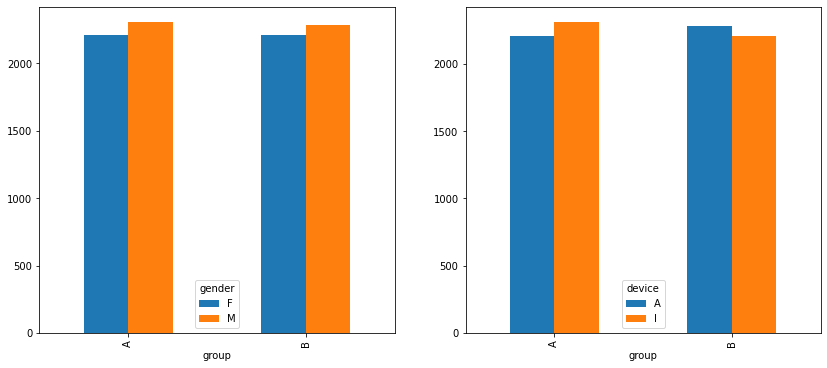

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

country_ab_records_df.groupby(['group'])['gender'].value_counts().unstack().plot.bar(ax=axs[0])

country_ab_records_df.groupby(['group'])['device'].value_counts().unstack().plot.bar(ax=axs[1])

#### Conclusions

It is more or less proportional.

### 1.4. Determine best sample size

#### 1.4.1 Original distributions

##### Site and App

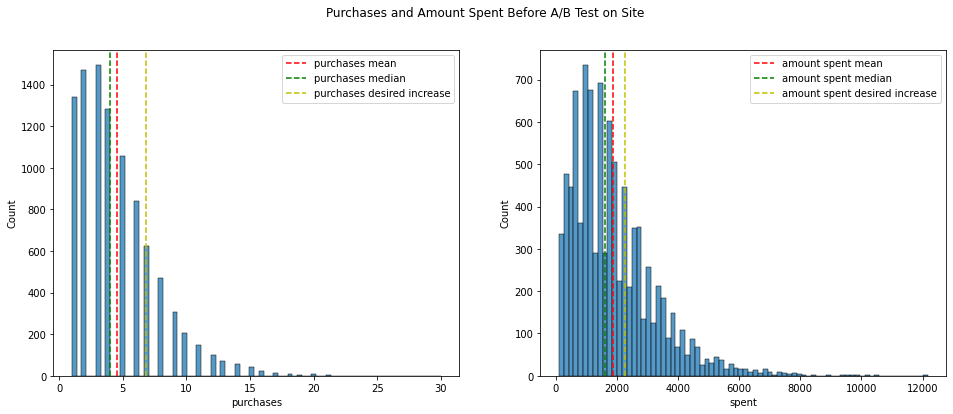

In [28]:
# input desired increase in percentage
perc_purchases_desired_increase = 50
perc_spent_desired_increase = 20

pre_ab_test_site_mean_purchases = pre_ab_site_page_df.purchases.mean()
pre_ab_test_site_median_purchases = pre_ab_site_page_df.purchases.median()

pre_ab_test_site_mean_spent = pre_ab_site_page_df.spent.mean()
pre_ab_test_site_median_spent = pre_ab_site_page_df.spent.median()

desired_purchases = pre_ab_test_site_mean_purchases + (pre_ab_test_site_mean_purchases * (perc_purchases_desired_increase/100))
desired_spent = pre_ab_test_site_mean_spent + (pre_ab_test_site_mean_spent * (perc_spent_desired_increase/100))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
fig.suptitle('Purchases and Amount Spent Before A/B Test on Site')


sns.histplot(data=pre_ab_site_page_df, x='purchases', ax=axs[0])
axs[0].axvline(x=pre_ab_test_site_mean_purchases, color='r', linestyle='--', label='purchases mean')
axs[0].axvline(x=pre_ab_test_site_median_purchases, color='g', linestyle='--', label='purchases median')
axs[0].axvline(x=desired_purchases, color='y', linestyle='--', label='purchases desired increase')
axs[0].legend()

sns.histplot(data=pre_ab_site_page_df, x='spent', ax=axs[1])
axs[1].axvline(x=pre_ab_site_page_df.spent.mean(), color='r', linestyle='--', label='amount spent mean')
axs[1].axvline(x=pre_ab_site_page_df.spent.median(), color='g', linestyle='--', label='amount spent median')
axs[1].axvline(x=desired_spent, color='y', linestyle='--', label='amount spent desired increase')
axs[1].legend()

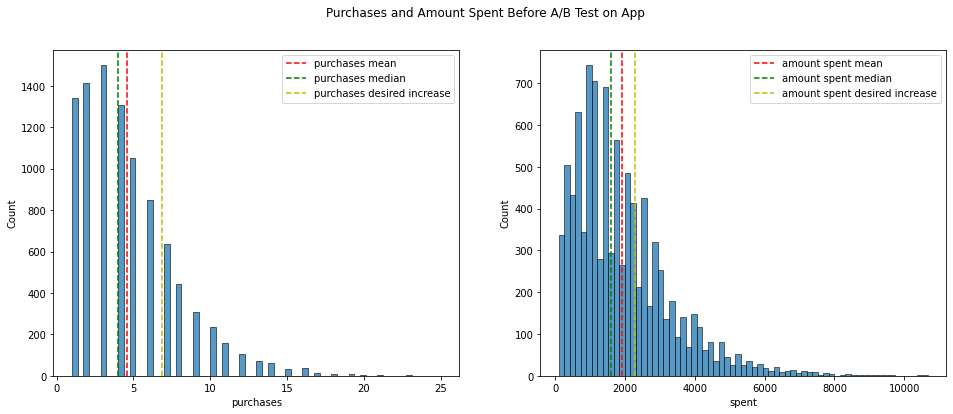

In [29]:
# input desired increase in percentage
perc_purchases_desired_increase = 50
perc_spent_desired_increase = 20

pre_ab_test_app_mean_purchases = pre_ab_app_page_df.purchases.mean()
pre_ab_test_app_median_purchases = pre_ab_app_page_df.purchases.median()

pre_ab_test_app_mean_spent = pre_ab_app_page_df.spent.mean()
pre_ab_test_app_median_spent = pre_ab_app_page_df.spent.median()

desired_purchases = pre_ab_test_app_mean_purchases + (pre_ab_test_app_mean_purchases * (perc_purchases_desired_increase/100))
desired_spent = pre_ab_test_app_mean_spent + (pre_ab_test_app_mean_spent * (perc_spent_desired_increase/100))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
fig.suptitle('Purchases and Amount Spent Before A/B Test on App')


sns.histplot(data=pre_ab_app_page_df, x='purchases', ax=axs[0])
axs[0].axvline(x=pre_ab_test_app_mean_purchases, color='r', linestyle='--', label='purchases mean')
axs[0].axvline(x=pre_ab_test_app_median_purchases, color='g', linestyle='--', label='purchases median')
axs[0].axvline(x=desired_purchases, color='y', linestyle='--', label='purchases desired increase')
axs[0].legend()

sns.histplot(data=pre_ab_app_page_df, x='spent', ax=axs[1])
axs[1].axvline(x=pre_ab_app_page_df.spent.mean(), color='r', linestyle='--', label='amount spent mean')
axs[1].axvline(x=pre_ab_app_page_df.spent.median(), color='g', linestyle='--', label='amount spent median')
axs[1].axvline(x=desired_spent, color='y', linestyle='--', label='amount spent desired increase')
axs[1].legend()

##### All devices

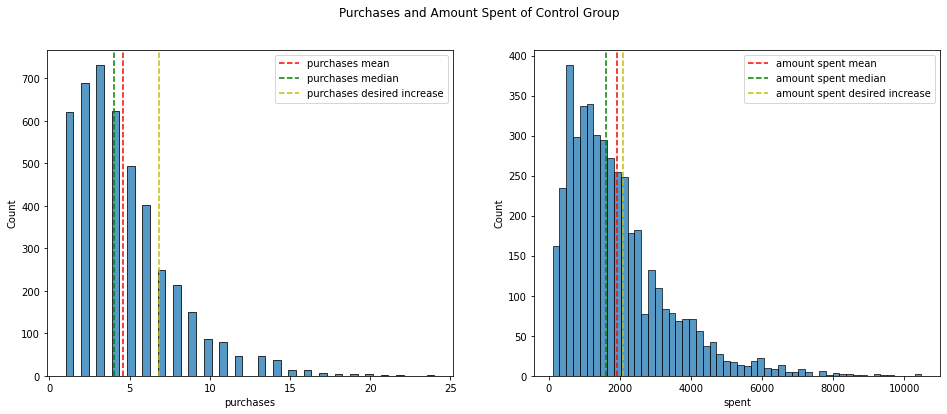

In [30]:
# original metrics calculated from the control group A

control_group = 'A'
control_group_df = country_ab_records_df.loc[country_ab_records_df['group'] == control_group]

purchases_lift_perc = 50
spent_lift_perc = 10

orig_mean_purchases = control_group_df['purchases'].mean()
orig_median_purchases = control_group_df['purchases'].median()
orig_std_purchases = control_group_df['purchases'].std()
goal_mean_purchases = orig_mean_purchases * (1 + (purchases_lift_perc/100))
goal_median_purchases = orig_median_purchases * (1 + (purchases_lift_perc/100))

orig_mean_spent = control_group_df['spent'].mean()
orig_median_spent = control_group_df['spent'].median()
orig_std_spent = control_group_df['spent'].std()
goal_mean_spent = orig_mean_spent * (1 + (spent_lift_perc/100))
goal_median_spent = orig_median_spent * (1 + (spent_lift_perc/100))


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
fig.suptitle('Purchases and Amount Spent of Control Group')

sns.histplot(data=control_group_df, x='purchases', ax=axs[0])
axs[0].axvline(x=orig_mean_purchases, color='r', linestyle='--', label='purchases mean')
axs[0].axvline(x=orig_median_purchases, color='g', linestyle='--', label='purchases median')
axs[0].axvline(x=goal_mean_purchases, color='y', linestyle='--', label='purchases desired increase')
axs[0].legend()

sns.histplot(data=control_group_df, x='spent', ax=axs[1])
axs[1].axvline(x=orig_mean_spent, color='r', linestyle='--', label='amount spent mean')
axs[1].axvline(x=orig_median_spent, color='g', linestyle='--', label='amount spent median')
axs[1].axvline(x=goal_mean_spent, color='y', linestyle='--', label='amount spent desired increase')
axs[1].legend()

#### 1.4.2 Effect Size

In [31]:
# In this case the median should be used to calculate the effect size by looking at the population distribution and observing that it is skewed (find a theorectical logical reason)

# Glass's delta effect size
effect_size_purchases = (goal_mean_purchases - orig_mean_purchases)/orig_std_purchases 
effect_size_spent = (goal_mean_spent - orig_mean_spent)/orig_std_spent

print(f'Effect Size for purchases: {effect_size_purchases:.3f}')
print(f'Effect Size for amount spent: {effect_size_spent:.3f}')

Effect Size for purchases: 0.721
Effect Size for amount spent: 0.134


In [32]:
# # effect size only by differencing averages

# site_purchases_effect_size = desired_purchases - pre_ab_test_site_mean_purchases
# site_spent_effect_size = desired_spent - pre_ab_test_site_mean_spent

# app_purchases_effect_size = desired_purchases - pre_ab_test_app_mean_purchases
# app_spent_effect_size = desired_spent - pre_ab_test_app_mean_spent

# print(f'Effect Size for purchases on site: {site_purchases_effect_size:.2f}')
# print(f'Effect Size for amount spent on site: {site_spent_effect_size:.2f}',end='\n\n')

# print(f'Effect Size for purchases on app: {app_purchases_effect_size:.2f}')
# print(f'Effect Size for amount spent on app: {app_spent_effect_size:.2f}')

In [33]:
# # effect size with Cohen d

# site_purchases_effect_size = pg.compute_effsize(pre_ab_test_site_mean_purchases, desired_purchases, eftype='cohen')
# site_spent_effect_size = pg.compute_effsize(pre_ab_test_site_mean_spent, desired_spent, eftype='cohen')

# app_purchases_effect_size = pg.compute_effsize(pre_ab_test_app_mean_purchases, desired_purchases, eftype='cohen') 
# app_spent_effect_size = pg.compute_effsize(pre_ab_test_app_mean_spent, desired_spent, eftype='cohen')

# site_purchases_effect_size

# print(f'Effect Size for purchases on site: {site_purchases_effect_size:.2f}')
# print(f'Effect Size for amount spent on site: {site_spent_effect_size:.2f}',end='\n\n')

# print(f'Effect Size for purchases on app: {app_purchases_effect_size:.2f}')
# print(f'Effect Size for amount spent on app: {app_spent_effect_size:.2f}')

#### 1.4.3 Sample Size

In [34]:
analysis = sm.stats.TTestIndPower()
sample_size_purchases = analysis.solve_power(effect_size=effect_size_purchases, alpha=0.05, power=0.8, alternative='larger')
sample_size_spent = analysis.solve_power(effect_size=effect_size_spent, alpha=0.05, power=0.8, alternative='larger')

sample_size_purchases = np.ceil(sample_size_purchases).astype(int)
sample_size_spent = np.ceil(sample_size_spent).astype(int)

print(f'Sample Size for purchases: {sample_size_purchases}')
print(f'Sample Size for amount spent: {sample_size_spent}')

Sample Size for purchases: 25
Sample Size for amount spent: 685


### 1.5. Determine the statistical test

#### Normality Test

- Using Shapiro-Wilk test the null hypothesis is that the distribution of the variable does not follow a distribution other than normal

In [35]:
country_ab_records_df.shape

(9009, 8)

In [36]:
#perform Shapiro-Wilk test
normality_results_purchases = shapiro(country_ab_records_df['purchases'])
normality_results_spent = shapiro(country_ab_records_df['spent'])

alpha_level = 0.05

if normality_results_purchases[1] < alpha_level: 
    print(f'The null hypothesis is rejected, stating that the variable purchases do not follow a normal distribution with 95% confidence level\n')
else:
    print(f'The null hypothesis is not rejected, stating that the variable purchases do follow a normal distribution with 5% chance of not being normal\n')
    
if normality_results_spent[1] < alpha_level: 
    print(f'The null hypothesis is rejected, stating that the variable spent do not follow a normal distribution with 95% confidence level\n')
else:
    print(f'The null hypothesis is not rejected, stating that the variable spent do follow a normal distribution with 5% chance of not being normal\n')

The null hypothesis is rejected, stating that the variable purchases do not follow a normal distribution with 95% confidence level

The null hypothesis is rejected, stating that the variable spent do not follow a normal distribution with 95% confidence level



/home/data-madness/Documents/SynologyDrive/Projects/AB-Test-Products-Recommendation-Section/env_ab_prod_rec/lib/python3.8/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## 2.0 Statistical Test

In [37]:
# sample an equal number for the statistical test to work
total_sample_size = 4400

sample_A_purchases = ab_test_df['purchases'].sample(n=total_sample_size, random_state=42, replace=False)
sample_B_purchases = ab_control_df['purchases'].sample(n=total_sample_size, random_state=42, replace=False)

sample_A_spent = ab_test_df['spent'].sample(n=total_sample_size, random_state=42, replace=False)
sample_B_spent = ab_control_df['spent'].sample(n=total_sample_size, random_state=42, replace=False)

print(f'Average Purchases Sample A: {np.round(sample_A_purchases.mean(),2)} +/- {np.round(sample_A_purchases.std(),2)}')
print(f'Average Purchases Sample B: {np.round(sample_B_purchases.mean(),2)} +/- {np.round(sample_B_purchases.std(),2)}')
print()
print(f'Average Spent Sample A: {np.round(sample_A_spent.mean(),2)} +/- {np.round(sample_A_spent.std(),2)}')
print(f'Average Spent Sample B: {np.round(sample_B_spent.mean(),2)} +/- {np.round(sample_B_spent.std(),2)}')
print()

#perform the Wilcoxon-Signed Rank Test
test_purchases = stats.wilcoxon(sample_B_purchases, sample_A_purchases, alternative='greater')
test_spent = stats.wilcoxon(sample_B_spent, sample_A_spent, alternative='greater')

alpha_level = 0.05

if test_purchases[1] < alpha_level: 
    print(f'The null hypothesis is rejected, stating the difference between the number of purchases of test group and control group is statistically significant with 95% confidence level, with a p-value of {test_purchases[1]}\n')
else:
    print(f'The null hypothesis is not rejected, stating that the difference is not statistically significant between the number of purchases of test and control group with 5% chance of actually being significantly different, with a p-value of {test_purchases[1]}\n')
    
if test_spent[1] < alpha_level: 
    print(f'The null hypothesis is rejected, stating the difference between the amount spent of test group and control group is statistically significant with 95% confidence level, with a p-value of {test_spent[1]}\n')
else:
    print(f'The null hypothesis is not rejected, stating that the difference is not statistically significant between the amount spent of test and control group with 5% chance of actually being significantly different, with a p-value of {test_spent[1]}\n')

Average Purchases Sample A: 4.56 +/- 3.15
Average Purchases Sample B: 4.58 +/- 3.13

Average Spent Sample A: 1895.87 +/- 1401.74
Average Spent Sample B: 1902.81 +/- 1382.9

The null hypothesis is not rejected, stating that the difference is not statistically significant between the number of purchases of test and control group with 5% chance of actually being significantly different, with a p-value of 0.26711874940114144

The null hypothesis is not rejected, stating that the difference is not statistically significant between the amount spent of test and control group with 5% chance of actually being significantly different, with a p-value of 0.27225718897535134



## 3.0 Permutation Test

1. Combine the results from the different groups into a single data set.
2. Shuffle the combined data and then randomly draw (without replacement) a
resample of the same size as group A (clearly it will contain some data from the
other groups).
3. From the remaining data, randomly draw (without replacement) a resample of
the same size as group B.
4. Do the same for groups C, D, and so on. You have now collected one set of
resamples that mirror the sizes of the original samples.
5. Whatever statistic or estimate was calculated for the original samples (e.g., difference in group proportions), calculate it now for the resamples, and record; this
constitutes one permutation iteration.
6. Repeat the previous steps R times to yield a permutation distribution of the test
statistic.
7. Then to conclude if the difference is really statistically significant and greater, the difference from each iteration must not be greater than the original observed difference more than 5% of the times, with a 5% significance level.

### 3.1. A sample from each group

In [38]:
sample_A_purchases = ab_test_df['purchases'].sample(n=sample_size_purchases, random_state=42, replace=False)
sample_B_purchases = ab_control_df['purchases'].sample(n=sample_size_purchases, random_state=42, replace=False)

sample_A_spent = ab_test_df['spent'].sample(n=sample_size_spent, random_state=42, replace=False)
sample_B_spent = ab_control_df['spent'].sample(n=sample_size_spent, random_state=42, replace=False)


print(f'Average Purchases Sample A: {np.round(sample_A_purchases.mean(),2)} +/- {np.round(sample_A_purchases.std(),2)}')
print(f'Average Purchases Sample B: {np.round(sample_B_purchases.mean(),2)} +/- {np.round(sample_B_purchases.std(),2)}')
print()
print(f'Average Spent Sample A: {np.round(sample_A_spent.mean(),2)} +/- {np.round(sample_A_spent.std(),2)}')
print(f'Average Spent Sample B: {np.round(sample_B_spent.mean(),2)} +/- {np.round(sample_B_spent.std(),2)}')

Average Purchases Sample A: 5.68 +/- 3.21
Average Purchases Sample B: 4.36 +/- 2.22

Average Spent Sample A: 1925.75 +/- 1394.8
Average Spent Sample B: 1893.24 +/- 1395.25


In [39]:
#perform the Wilcoxon-Signed Rank Test
test_purchases = stats.wilcoxon(sample_B_purchases, sample_A_purchases, alternative='greater')
test_spent = stats.wilcoxon(sample_B_spent, sample_A_spent, alternative='greater')

alpha_level = 0.05

if test_purchases[1] < alpha_level: 
    print(f'The null hypothesis is rejected, stating the difference between the number of purchases of test group and control group is statistically significant with 95% confidence level, with a p-value of {test_purchases[1]}\n')
else:
    print(f'The null hypothesis is not rejected, stating that the difference is not statistically significant between the number of purchases of test and control group with 5% chance of actually being significantly different, with a p-value of {test_purchases[1]}\n')
    
if test_spent[1] < alpha_level: 
    print(f'The null hypothesis is rejected, stating the difference between the amount spent of test group and control group is statistically significant with 95% confidence level, with a p-value of {test_spent[1]}\n')
else:
    print(f'The null hypothesis is not rejected, stating that the difference is not statistically significant between the amount spent of test and control group with 5% chance of actually being significantly different, with a p-value of {test_spent[1]}\n')

The null hypothesis is not rejected, stating that the difference is not statistically significant between the number of purchases of test and control group with 5% chance of actually being significantly different, with a p-value of 0.9331799745559692

The null hypothesis is not rejected, stating that the difference is not statistically significant between the amount spent of test and control group with 5% chance of actually being significantly different, with a p-value of 0.6414661433523171



### 3.2. Multiple iterations

In [40]:
def permutation_diff(records_df, n_control, n_test):
    n = n_control + n_test
    idx_test = set(random.sample(range(n), n_test))
    idx_control = set(range(n)) - idx_test
    return records_df.loc[list(idx_test)].mean() - records_df.loc[list(idx_control)].mean()

Text(0, 0.5, 'Frequency')

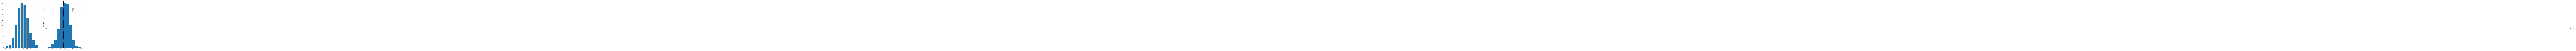

In [41]:
control_mean_purchases = ab_control_df['purchases'].mean()
test_mean_purchases = ab_test_df['purchases'].mean()

control_mean_spent = ab_control_df['spent'].mean()
test_mean_spent = ab_test_df['spent'].mean()

perm_diffs_purchases = [permutation_diff(country_ab_records_df['purchases'].reset_index(drop=True), ab_control_df['purchases'].shape[0], ab_test_df['purchases'].shape[0]) for _ in range(1000)]
perm_diffs_spent = [permutation_diff(country_ab_records_df['spent'].reset_index(drop=True), ab_control_df['spent'].shape[0], ab_test_df['spent'].shape[0]) for _ in range(1000)]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,10))

axs[0].hist(perm_diffs_purchases, bins=11, rwidth=0.9)
axs[0].axvline(x=test_mean_purchases - control_mean_purchases, color='black', lw=2, linestyle='--')
axs[0].text(30, 80, 'Observed\ndifference\non purchases', bbox={'facecolor':'white'})
axs[0].set_xlabel('Purchases differences')
axs[0].set_ylabel('Frequency')

axs[1].hist(perm_diffs_spent, bins=11, rwidth=0.9)
axs[1].axvline(x=test_mean_spent - control_mean_spent, color='black', lw=2, linestyle='--')
axs[1].text(50, 190, 'Observed\ndifference\non amount spent', bbox={'facecolor':'white'})
axs[1].set_xlabel('Amount Spent differences')
axs[1].set_ylabel('Frequency')

In [42]:
perc_exceeding_purchases = np.round(np.mean(perm_diffs_purchases > (test_mean_purchases - control_mean_purchases))*100,2)
perc_exceeding_spent = np.round(np.mean(perm_diffs_spent > (test_mean_spent - control_mean_spent))*100,2)

print(f'Percentage of times that the mean difference of random permutations exceeds the observed difference of purchases:\n{perc_exceeding_purchases}%')
print(f'Percentage of times that the mean difference of random permutations exceeds the observed difference of spent:\n{perc_exceeding_spent}%')

Percentage of times that the mean difference of random permutations exceeds the observed difference of purchases:
57.9%
Percentage of times that the mean difference of random permutations exceeds the observed difference of spent:
58.1%


### Conclusion

1. The new recommendation section page in Brazil did not shown enough evidence to admit changing the old section.